In [1]:
# Data analysis 
import numpy as np
import pandas as pd

#Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from _plotly_future_ import v4_subplots
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
import plotly.graph_objects as go

# Imputing missing values
from scipy.stats import chi2_contingency

#Feature 
#Rank - Ranking of overall sales
#Name - The games name
#Platform - Platform of the games release (i.e. PC,PS4, etc.)
#Year - Year of the game's release
#Genre - Genre of the game
#Publisher - Publisher of the game
#NA_Sales - Sales in North America (in millions)
##EU_Sales - Sales in Europe (in millions)
#JP_Sales - Sales in Japan (in millions)
#Other_Sales - Sales in the rest of the world (in millions)
#Global_Sales - Total worldwide sales.

## Data Exploration 

In [2]:
vg = pd.read_csv("/content/vgsales.csv")   # to import data 

In [3]:
vg.head(10)  # to show first 10 row of data 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
vg.info()  # to see informaton about feature 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
vg.describe()  # to see som info about mean &min & max & standard deviation 

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
vg.columns  # to see the coulmns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [7]:
vg.shape # to see the number of data set

(16598, 11)

In [8]:
#see duplicated data or not 
vg.drop_duplicates(subset=['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
vg.drop(['Rank'],axis=1,inplace=True)  # will drop Rank 

In [10]:
vg.describe()  #to see what change afte  dropping rank 

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
vg.shape

(16598, 10)

In [12]:
vg.isnull().sum() # to see missing data 

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

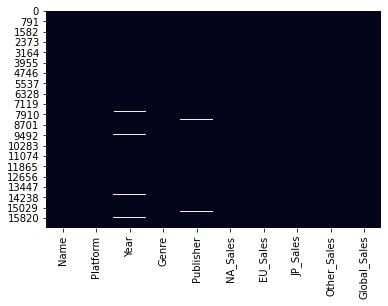

In [13]:
sns.heatmap(vg.isnull(), cbar=False)  # to see missing data in figure 

In [14]:
# Remove rows with null values
vg.dropna(inplace= True)


In [15]:
vg.isnull().sum()  # to see data after solveing missing data 

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [16]:
vg.shape

(16291, 10)

## Data visualization 

In [17]:
# to see the relation between years and Globel sales 
import plotly  
import plotly.express as px
grouped = vg.groupby(vg.Year)[["Global_Sales"]].sum()
grouped = grouped.sort_values(by = "Global_Sales" , ascending = False)
grouped = grouped.head(10)

# plottng 

fig = px.pie(data_frame = grouped , 
            names = grouped.index , 
            values = "Global_Sales" , 
            template = "seaborn" , 
            hole = 0.4 , 
            color_discrete_sequence = px.colors.sequential.Inferno , 
            )

fig.update_layout(title = "Top 10 years for gaming market", 
                  paper_bgcolor = "rgb(230,230,230)" , 
                 plot_bgcolor = "rgb(243,243,243)" , 
                 annotations= [dict(text = "Global Sales" , font_size = 20 , showarrow = False , opacity = 0.7)])

fig.update_traces (rotation = 90 , pull = 0.01, textinfo = "percent+label")
fig.show()

In [18]:
# Total Revenue by region  
region_sales = vg.iloc[:,-5:-1] # NA_Sales column to Other_Sales column
region_sales = region_sales.sum(axis=0).reset_index()
region_sales.columns = ['Region','Sales']
region_sales

,Region,Sales
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


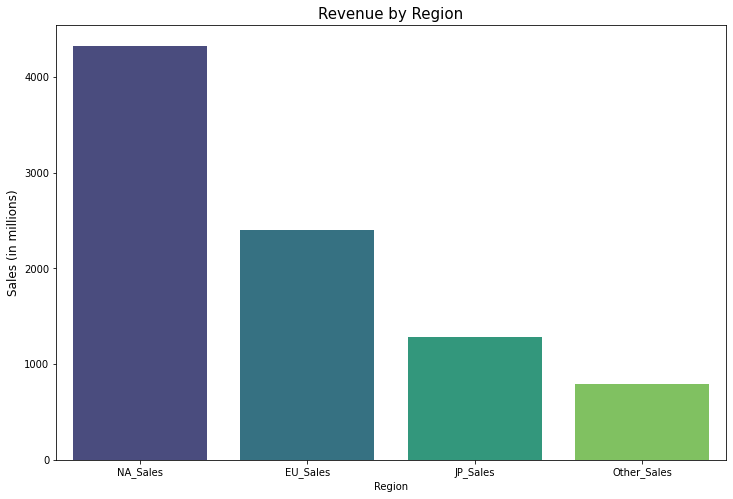

In [19]:
# Barplot showing total revenue by region
plt.figure(figsize=(12,8))
sns.barplot(x='Region', y='Sales', data=region_sales, palette='viridis')
plt.title("Revenue by Region",fontsize=15)
plt.ylabel("Sales (in millions)",fontsize=12)
plt.show()

Text(0, 0.5, 'avg global_sales')

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



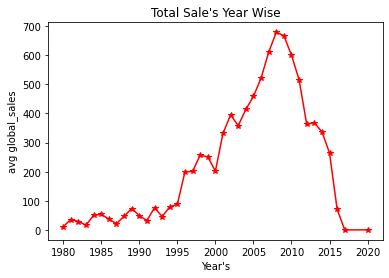

In [20]:
# to see the curve of year with global sales 
total_sales_year = pd.pivot_table(vg,index = "Year",values = "Global_Sales",aggfunc= np.sum)
#print(avg_sales_year_wise) #uncomment this to know Total sale's value's with respect each year.
plt.plot(total_sales_year.index,total_sales_year["Global_Sales"],color = 'R',marker = "*")
plt.title("Total Sale's Year Wise")
plt.xlabel("Year's")
plt.ylabel("avg global_sales")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Year of global game sales :')

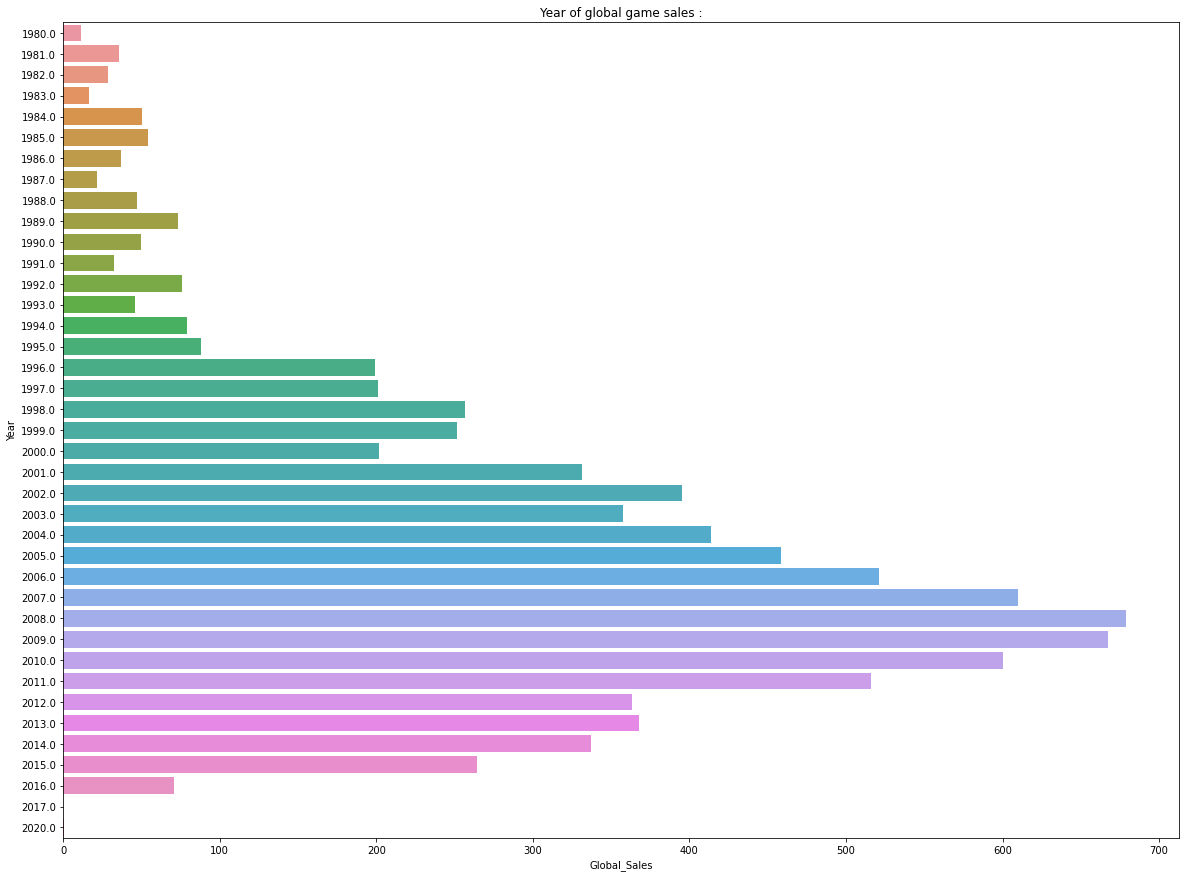

In [21]:
# Another graph to show years with global sales 
plt.rcParams['figure.figsize'] = (20,15)
year_of_game_sales  = pd.pivot_table(vg ,index = "Year" ,
                                       values = "Global_Sales",
                                       aggfunc = np.sum)
sns.barplot(year_of_game_sales["Global_Sales"],year_of_game_sales.index,orient = "h")
plt.title("Year of global game sales :")

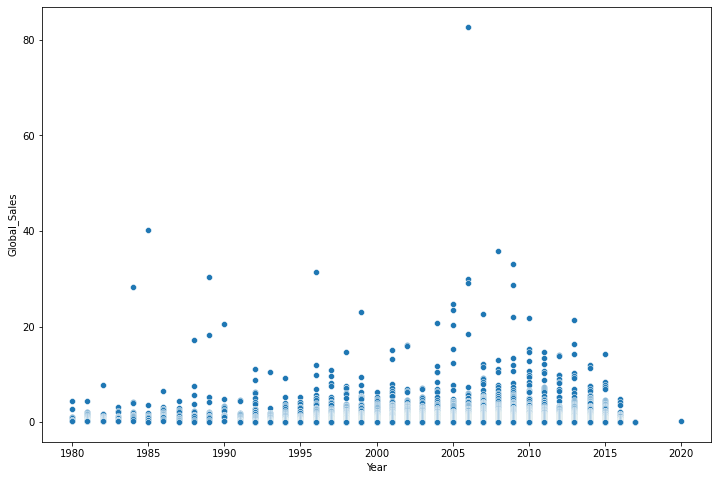

In [72]:
##visualize year  with globel sales in scattorplot
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year',y='Global_Sales',data=vg)

# Name@Global sales

In [22]:
Name_of_game = vg.groupby('Name').sum() # create new df with sales by name of game 
Name_of_game.sort_values('Global_Sales', ascending = False, inplace = True) # Sort by global sales, descending
Name_of_game.head(10) # Check out the top 10

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,
Wii Sports,2006.0,41.49,29.02,3.77,8.46,82.74
Grand Theft Auto V,10069.0,23.46,23.04,1.39,8.03,55.92
Super Mario Bros.,3984.0,32.48,4.88,6.96,0.99,45.31
Tetris,3977.0,26.17,2.95,6.03,0.69,35.84
Mario Kart Wii,2008.0,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,2009.0,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,1996.0,11.27,8.89,10.22,1.00,31.37
Call of Duty: Modern Warfare 3,8044.0,15.58,11.29,0.62,3.35,30.83
New Super Mario Bros.,2006.0,11.38,9.23,6.50,2.90,30.01


In [23]:
# to show name of game in graph  with globel sales 
import plotly
import plotly.express as px
Name_of_game['Name'] = Name_of_game.index

#Lets use Plotly to throw up a simple pie chart
pie_chart = px.pie(
            data_frame = Name_of_game.head(10),
            values = 'Global_Sales',
            names = 'Name')
pie_chart

# Publisher&global Sales 

In [24]:
sales_by_publisher = vg.groupby('Publisher').sum() # create new df with sales by publisher
sales_by_publisher.sort_values('Global_Sales', ascending = False, inplace = True) # Sort by global sales, descending
sales_by_publisher.head(10) # Check out the top 10

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,
Nintendo,1394666.0,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,2686562.0,584.22,367.38,13.98,127.63,1093.39
Activision,1938979.0,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,1367034.0,265.22,187.55,74.10,80.40,607.28
Ubisoft,1843194.0,252.81,163.03,7.33,50.16,473.54
Take-Two Interactive,827344.0,220.47,117.95,5.83,55.20,399.30
THQ,1428311.0,208.60,94.60,5.01,32.11,340.44
Konami Digital Entertainment,1650392.0,88.91,68.62,90.93,29.91,278.56
Sega,1267395.0,108.78,81.41,56.19,24.30,270.70


In [25]:
# to see the relation with publesher and globel saels in  figure 
sales_by_publisher['Publisher'] = sales_by_publisher.index

#Lets use Plotly to throw up a simple pie chart
pie_chart = px.pie(
            data_frame = sales_by_publisher.head(10),
            values = 'Global_Sales',
            names = 'Publisher')
pie_chart

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top3 seller  wise global game sales :')

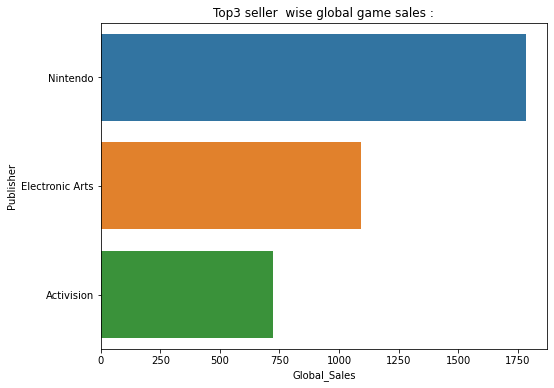

In [26]:
# Top3 seller  wise global game sales
plt.rcParams['figure.figsize'] = (8,6)
type_of_the_game  = pd.pivot_table(vg ,index = "Publisher",
                                           values = "Global_Sales",
                                           aggfunc = np.sum)
#type_of_the_game.sort_values("global_sales",ascending=False).head()
type_of_the_game  = type_of_the_game.sort_values(
                    by = "Global_Sales",ascending  = False).head(3)

sns.barplot(type_of_the_game["Global_Sales"],type_of_the_game.index,orient = "h")
plt.title("Top3 seller  wise global game sales :")

# Platform&global_sales


In [27]:
# to show platform with globel sales 
sales_by_publisher = vg.groupby('Platform').sum() # create new df with sales by publisher
sales_by_publisher.sort_values('Global_Sales', ascending = False, inplace = True) # Sort by global sales, descending
sales_by_publisher.head(10) # Check out the top 10

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,
PS2,4263750.0,572.92,332.63,137.54,190.47,1233.46
X360,2480191.0,594.33,278.00,12.30,84.67,969.60
PS3,2622109.0,388.90,340.47,79.21,140.81,949.35
Wii,2591562.0,497.37,264.35,68.28,79.20,909.81
DS,4279469.0,388.53,194.05,175.02,60.29,818.91
PS,2375627.0,334.71,212.38,139.78,40.69,727.39
GBA,1574496.0,178.43,72.49,46.56,7.51,305.62
PSP,2404440.0,107.09,67.16,75.89,41.52,291.71
PS4,677042.0,96.80,123.70,14.30,43.36,278.10


In [28]:
sales_by_publisher['Platform'] = sales_by_publisher.index

#Lets use Plotly to throw up a simple pie chart
pie_chart = px.pie(
            data_frame = sales_by_publisher.head(10),
            values = 'Global_Sales',
            names = 'Platform')
pie_chart

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top 10 Platform wise global game sales :')

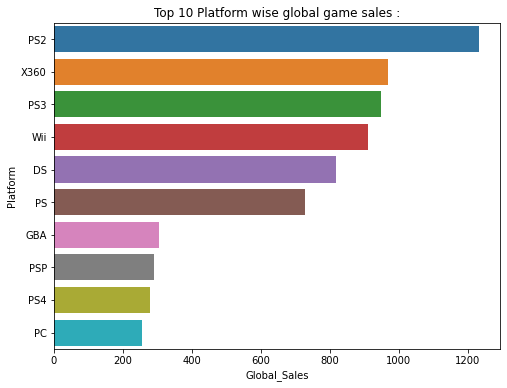

In [29]:
#another way to see platform in chart graph 
plt.rcParams['figure.figsize'] = (8,6)
platform_wise_game_sales  = pd.pivot_table(vg ,index = "Platform",
                                           values = "Global_Sales",
                                           aggfunc = np.sum)
#platform_wise_game_sales.sort_values("global_sales",ascending=False).head()
platform_wise_game_sales  = platform_wise_game_sales.sort_values(
                    by = "Global_Sales",ascending  = False).head(10)

sns.barplot(platform_wise_game_sales["Global_Sales"],platform_wise_game_sales.index,orient = "h")
plt.title("Top 10 Platform wise global game sales :")

In [30]:
# Platform and its sales acorss 
platform_sales = vg.groupby('Platform').sum().sort_values(by='Global_Sales',ascending = False).iloc[:,2:]
platform_sales.head()

,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,
PS2,332.63,137.54,190.47,1233.46
X360,278.00,12.30,84.67,969.60
PS3,340.47,79.21,140.81,949.35
Wii,264.35,68.28,79.20,909.81
DS,194.05,175.02,60.29,818.91


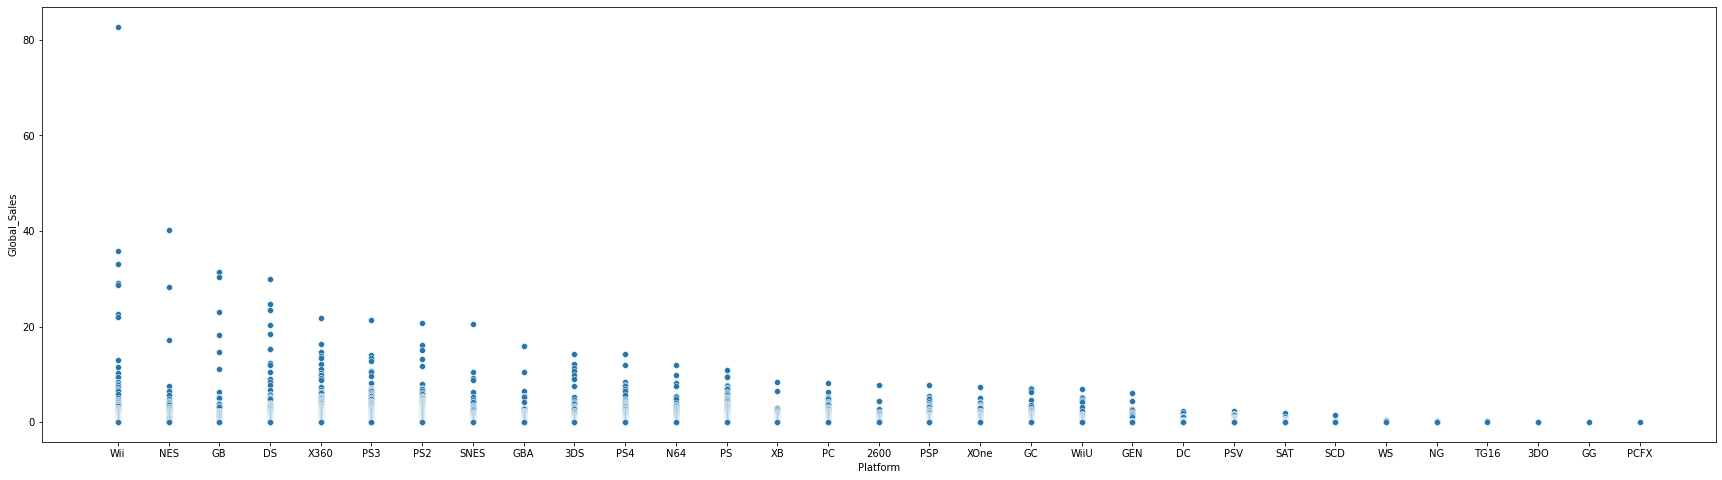

In [73]:
#visualize platform with globel sales in scattorplot 
plt.figure(figsize=(30,8))
sns.scatterplot(x='Platform',y='Global_Sales',data=vg)

# Genre of game

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top 10 Genre wise global game sales :')

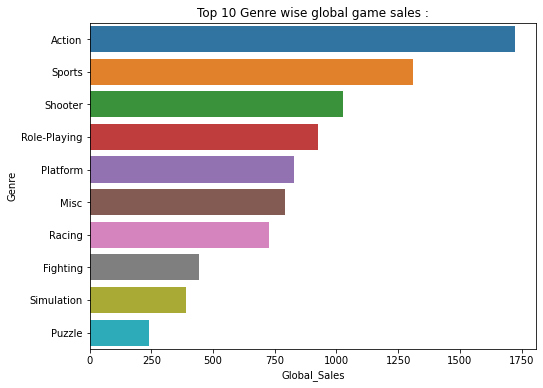

In [31]:
#to show in chart the genre of games 
plt.rcParams['figure.figsize'] = (8,6)
type_of_the_game  = pd.pivot_table(vg ,index = "Genre",
                                           values = "Global_Sales",
                                           aggfunc = np.sum)
#type_of_the_game.sort_values("global_sales",ascending=False).head()
type_of_the_game  = type_of_the_game.sort_values(
                    by = "Global_Sales",ascending  = False).head(10)

sns.barplot(type_of_the_game["Global_Sales"],type_of_the_game.index,orient = "h")
plt.title("Top 10 Genre wise global game sales :")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top3 games  wise global game sales :')

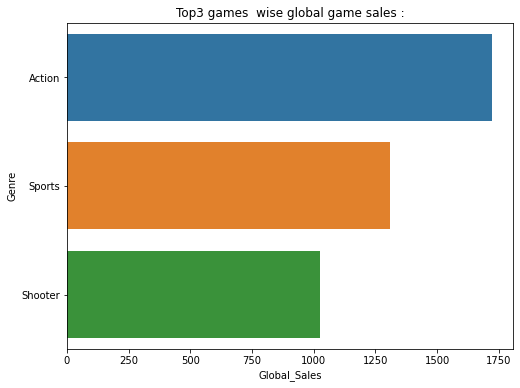

In [32]:
#Top3 games  wise global game sales
plt.rcParams['figure.figsize'] = (8,6)
type_of_the_game  = pd.pivot_table(vg ,index = "Genre",
                                           values = "Global_Sales",
                                           aggfunc = np.sum)
#type_of_the_game.sort_values("global_sales",ascending=False).head()
type_of_the_game  = type_of_the_game.sort_values(
                    by = "Global_Sales",ascending  = False).head(3)

sns.barplot(type_of_the_game["Global_Sales"],type_of_the_game.index,orient = "h")
plt.title("Top3 games  wise global game sales :")

In [71]:
a = [(vg.Genre=='Action').sum(), (vg.Genre=='Sports').sum(),
     (vg.Genre=='Shooter').sum(), (vg.Genre=='Role-Playing').sum(),
     (vg.Genre==' Misc').sum(), (vg.Genre=='Strategy').sum(),
     (vg.Genre=='Puzzle').sum(), (vg.Genre=='Simulation').sum(),
     (vg.Genre=='Racing').sum(), (vg.Genre=='Fighting').sum(), (vg.Genre=='Platform').sum()]
print(a)

[3251, 2304, 1282, 1470, 0, 670, 570, 848, 1225, 836, 875]


Text(0.5, 0, 'Years')

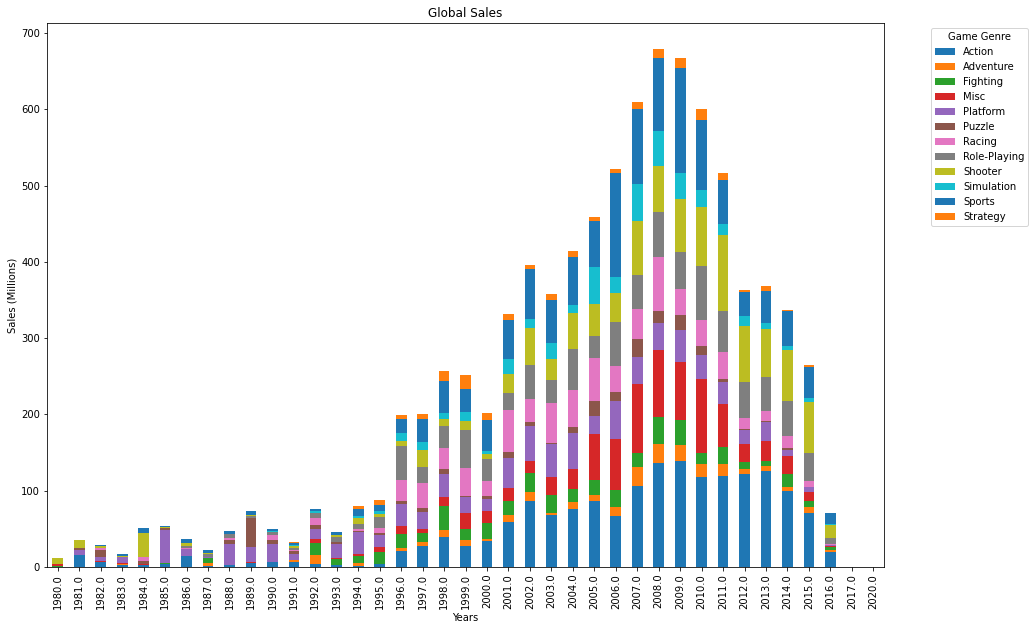

In [35]:
# to show spread of genre of game with globel sales 
vgs = vg.groupby(['Year','Genre']).agg({'Global_Sales':np.sum})

ax = vgs['Global_Sales'].unstack().plot.bar(stacked=True, figsize=(15,10))
plt.legend(title='Game Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Global Sales')
ax.set_ylabel('Sales (Millions)')
ax.set_xlabel('Years')

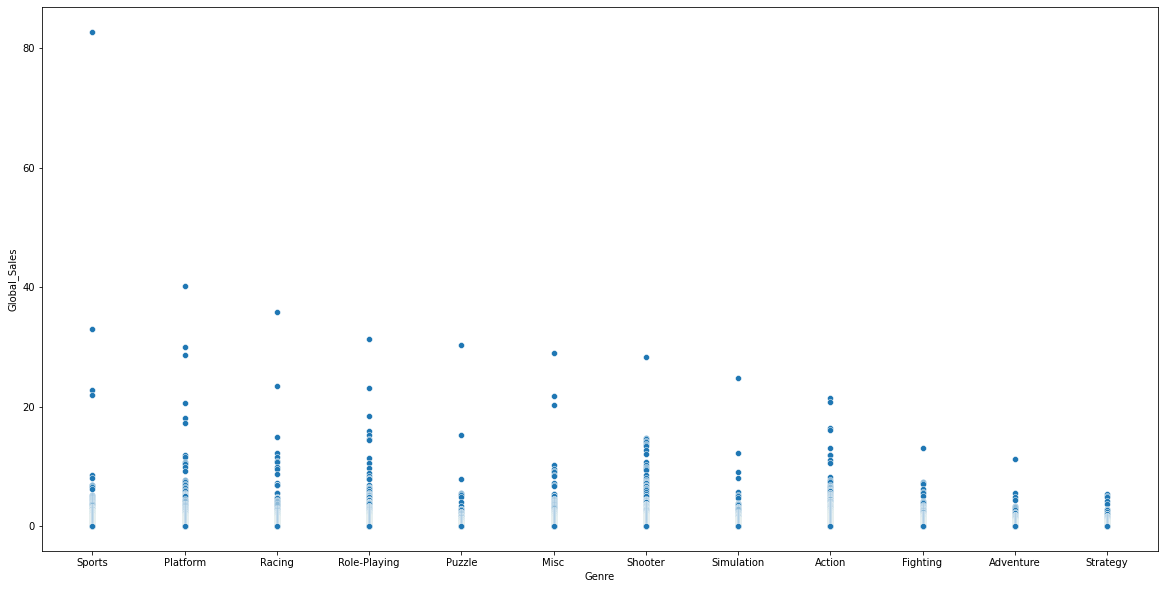

In [39]:
#visualize Genre with globel sales in scattorplot
plt.figure(figsize=(20,10))
sns.scatterplot(x='Genre',y='Global_Sales',data=vg)

# Sales catogrie

Text(0.5, 0, 'Year')

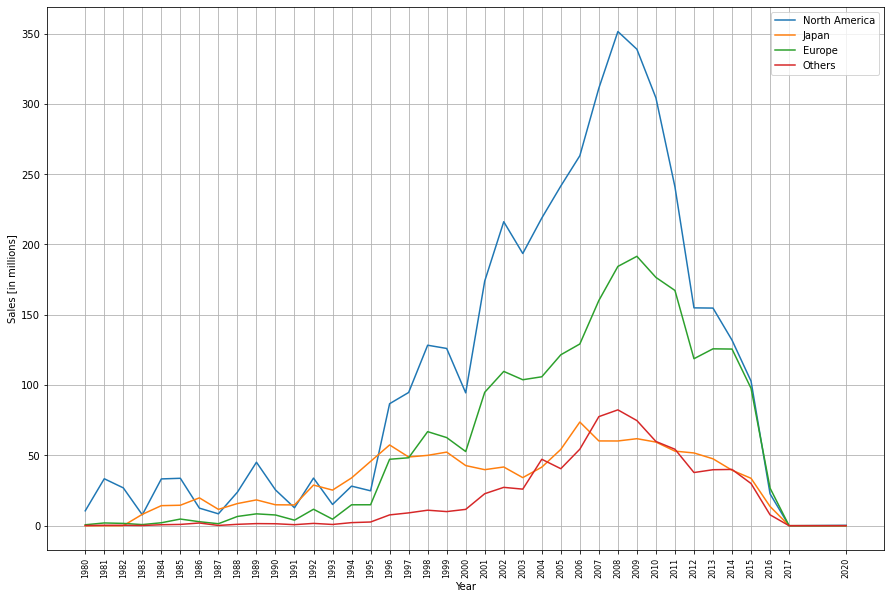

In [40]:
##visualize reagon with year in globel sales  
plt.figure(figsize=(30,8))
sns.scatterplot(x='Platform',y='Global_Sales',data=vg)
n=vg.groupby('Year').NA_Sales.sum()
j=vg.groupby('Year').JP_Sales.sum()
e=vg.groupby('Year').EU_Sales.sum()
o=vg.groupby('Year').Other_Sales.sum()
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(n.index,n.values,label='North America')
plt.plot(j.index,j.values,label='Japan')
plt.plot(e.index,e.values,label='Europe')
plt.plot(o.index,o.values,label='Others')
plt.xticks(n.index,rotation='vertical',size=8)
plt.legend()
plt.ylabel('Sales [in millions]')
plt.xlabel('Year')

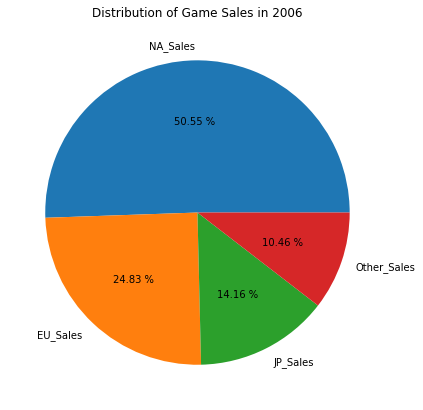

In [74]:
# year=float(input("Enter the year: "))
x=vg.groupby('Year').sum()
x=x.drop(columns='Global_Sales')
year=2006 #                                            
td=dict(x.loc[year])
plt.figure(figsize=(9,7))
plt.title("Distribution of Game Sales in "+str(year))
plt.pie(td.values(),autopct='%.2f %% ',labels=td.keys())
plt.show()

In [44]:
#3D scatter plot between North America , Europe and Japan Sales
fig = px.scatter_3d(data_frame = vg[vg["Year"] > 2000].sort_values(by = "Year" , ascending = True) , 
                  x = "NA_Sales" , 
                  y = "EU_Sales" , 
                  z = "JP_Sales" , 
                  labels = {
                      "NA_Sales" : "NA Sales" , 
                      "EU_Sales" : "EU Sales" , 
                      "JP_Sales" : "JP Sales"
                  } , 
                  animation_frame = "Year" , 
                  size = "Other_Sales" , 
                  width = 800 , 
                  height = 600 , 
                  size_max = 50 , 
                  opacity = 0.8 , 
                  color = "Genre")


fig.update_layout(title = "3D scatter plot between North America , Europe and Japan Sales" , 
                  
                 paper_bgcolor = 'rgb(230,230,230)' , 
                 plot_bgcolor = "rgb(243,243,243)" , 
                 showlegend = True)
fig.show()

# figure of relation

Text(0.5, 1.0, 'Count of games')

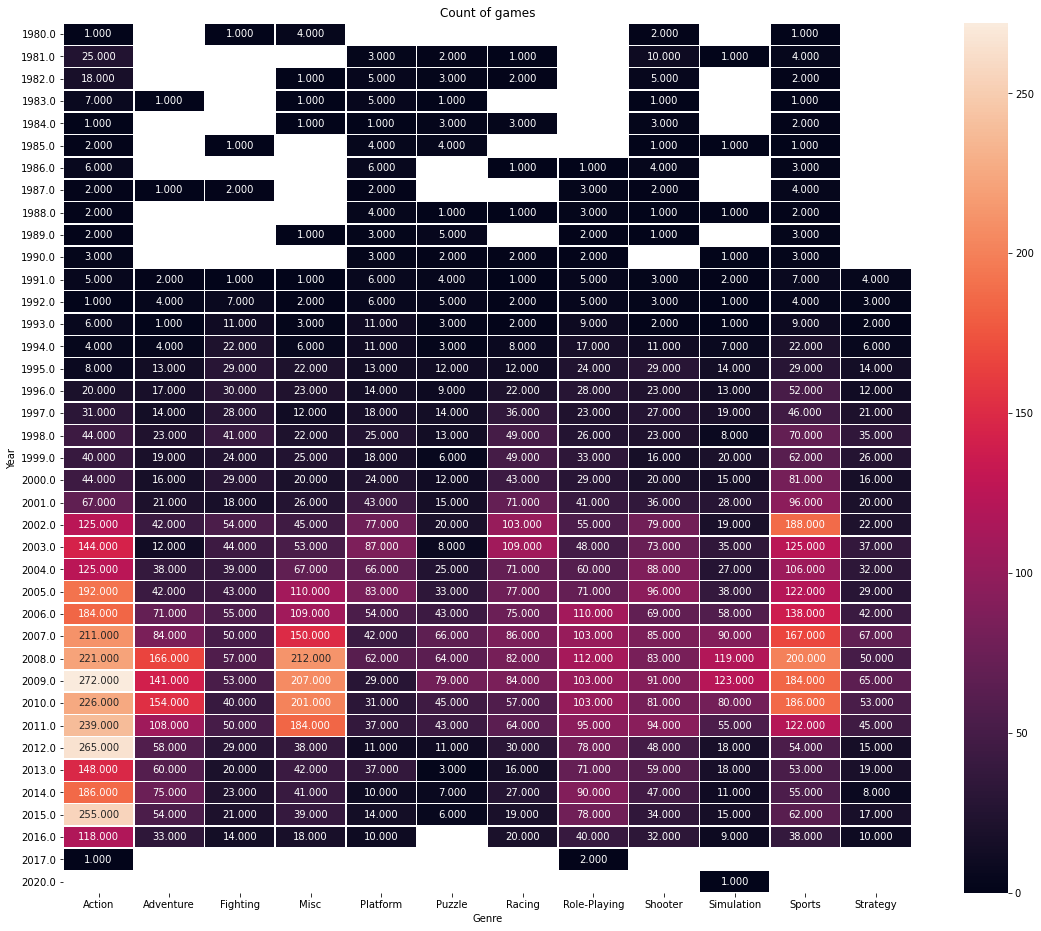

In [45]:
# count of games at evry year 
table_count = pd.pivot_table(vg,values=['Global_Sales'],index=['Year'],columns=['Genre'],aggfunc='count',margins=False)

plt.figure(figsize=(19,16))
sns.heatmap(table_count['Global_Sales'],linewidths=.5,annot=True,fmt='0.3f',vmin=0)
plt.title('Count of games')

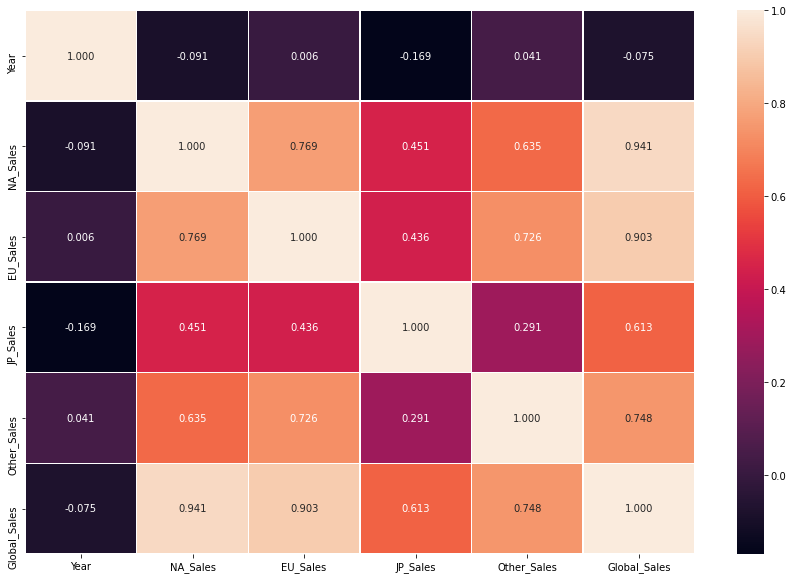

In [47]:
#VISUALIZATIONS
# Correlation Heatmap  confirms what found with the pairplot
cor_mat=vg.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

# train_test_split

In [48]:
vg.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [49]:
X = vg[[ 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = vg['Global_Sales']


In [50]:
vg['Global_Sales'].value_counts()

0.02     1045
0.03      795
0.04      634
0.05      624
0.01      600
         ... 
2.24        1
22.00       1
5.50        1
2.75        1
33.00       1
Name: Global_Sales, Length: 621, dtype: int64

In [51]:
X.shape

(16291, 4)

In [52]:
y.shape

(16291,)

In [53]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25, random_state = 42)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score


#Decision **tree**

In [55]:
dtr = DecisionTreeRegressor(max_depth=4,max_features=4,random_state = 42)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [56]:
print(f'Score of Decision Tree Regressor Model: {dtr.score(X_train, y_train) * 100}%')


Score of Decision Tree Regressor Model: 93.45156894393625%


In [57]:
print(f'Score of Decision Tree Regressor Model: {dtr.score(X_test, y_test) * 100}%')


Score of Decision Tree Regressor Model: 92.63282076309683%


In [59]:
print(f'Mean Absolute Error: ' + str(mean_absolute_error(dtr_pred, y_test)) + ' - Decision Tree Regressor Model')

Mean Absolute Error: 0.21330543221959997 - Decision Tree Regressor Model


#Random forest

In [62]:
rfg = RandomForestRegressor(max_depth=5,max_features=4,random_state =0)
rfg.fit(X_train, y_train)
rfg_pred = rfg.predict(X_test)

In [63]:
print(f'Score of Random Forest Regressor Model: {rfg.score(X_train, y_train) * 100}%')

Score of Random Forest Regressor Model: 97.42881129924874%


In [64]:
print(f'Score of Random Forest Regressor Model: {rfg.score(X_test, y_test) * 100}%')


Score of Random Forest Regressor Model: 93.49496157099722%


In [66]:
print(f'Mean Absolute Error: ' + str(mean_absolute_error(rfg_pred, y_test)) + ' - Random Forest Regressor')

Mean Absolute Error: 0.1293628824827412 - Random Forest Regressor
